## **Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading dataset**

In [3]:
# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# Split the dataset into trainin, validation and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=50)
print(dataset)


     Unnamed: 0  location  country  gender   age  vis_wuhan  from_wuhan  \
0             0       104        8       1  66.0          1           0   
1             1       101        8       0  56.0          0           1   
2             2       137        8       1  46.0          0           1   
3             3       116        8       0  60.0          1           0   
4             4       116        8       1  58.0          0           0   
..          ...       ...      ...     ...   ...        ...         ...   
858         858        48        3       2  24.0          0           0   
859         859         0        0       2  35.0          0           0   
860         860         3        1       1  49.4          0           0   
861         861        24        9       1  49.4          0           0   
862         862        15       27       1  70.0          0           0   

     symptom1  symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  \
0          14     

# **SVM**

___________________SVM__________________


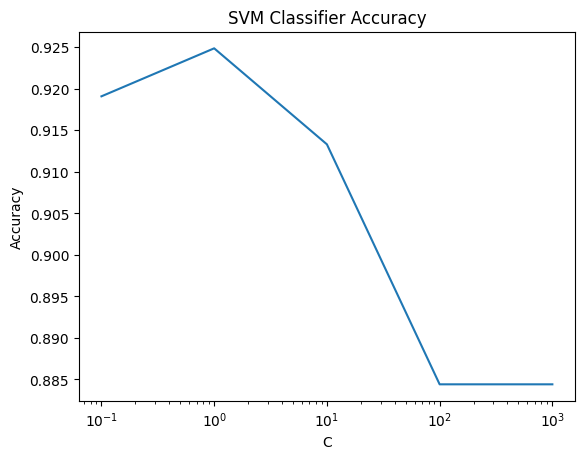

Best C value: 1
Validation Accuracy:  0.9248554913294798
Evaluation Accuracy:  0.9653179190751445
Evaluation Precision: 0.875
Evaluation Recall:    0.875
Evaluation F1:        0.875
ROC score:            0.9274328859060402


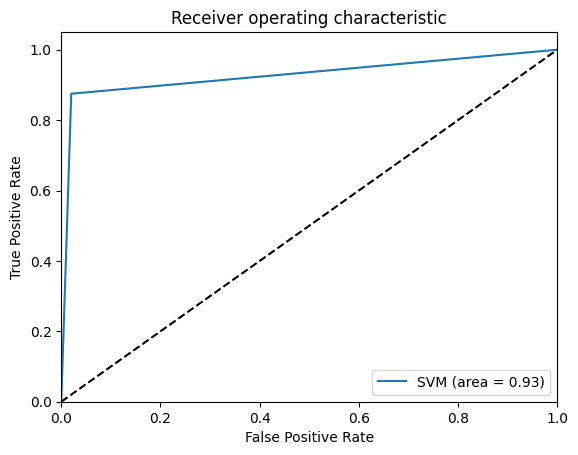

In [4]:
print("___________________SVM__________________")

# Create arrays to store C and accuracy values
C_values = [0.1, 1, 10, 100, 1000]
accuracy = []

# Train and validate the SVM classifier for different values of C
for C in C_values:
    SVM = SVC(kernel='linear', C=C, random_state=42)
    SVM.fit(X_train, y_train)
    y_val_pred = SVM.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracy.append(val_accuracy)

# Plot C versus accuracy
plt.plot(C_values, accuracy)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy')
plt.show()



# Create array to store C and accuracy values
C_values = [0.01, 0.1, 1, 10, 100]
accuracy = []

# Train and validate the SVM classifier for different values of C
for C in C_values:
    svm = SVC(C=C, kernel='linear', random_state=42)
    svm.fit(X_train, y_train)
    y_val_pred = svm.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracy.append(val_accuracy)

# Find the index of the best C value
best_C_idx = np.argmax(accuracy)
best_C = C_values[best_C_idx]
best_accuracy = accuracy[best_C_idx]

# Print the best C value and corresponding accuracy
print(f"Best C value: {best_C}")




# Train the SVM model
SVM = SVC(kernel='linear', C=1)
SVM.fit(X_train, y_train)
# Validate the SVM model
y_val_pred = SVM.predict(X_val)
SVM_Val_Accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", SVM_Val_Accuracy)
# Test the SVM model
y_pred = SVM.predict(X_test)
# Evaluate the SVM model
SVM_accuracy = accuracy_score(y_test, y_pred)
print("Evaluation Accuracy: ", SVM_accuracy)
SVM_precision = precision_score(y_test, y_pred)
print("Evaluation Precision:", SVM_precision)
SVM_recall = recall_score(y_test, y_pred)
print("Evaluation Recall:   ", SVM_recall)
SVM_f1 = f1_score(y_test, y_pred)
print("Evaluation F1:       ", SVM_f1)
SVM_ROC_SCORE = roc_auc_score(y_test,y_pred)
print("ROC score:           ",SVM_ROC_SCORE)

# Plot ROC curves for SVM classifier
SVM_fpr, SVM_tpr, SVM_thresholds = roc_curve(y_test, y_pred)
SVM_roc_auc = auc(SVM_fpr, SVM_tpr)
plt.plot(SVM_fpr, SVM_tpr, label='SVM (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




# **KNN**

___________________KNN__________________


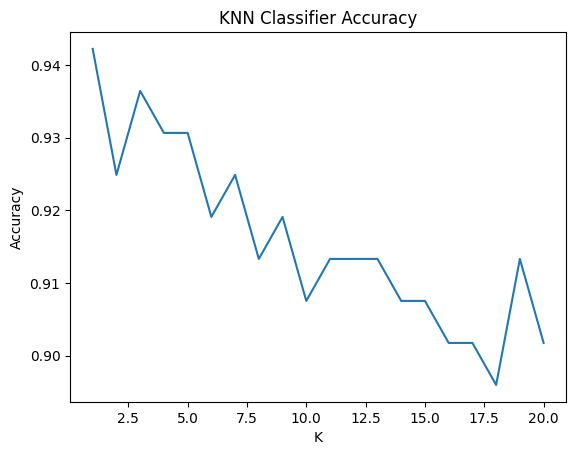

Best k value: 1
Validation Accuracy:  0.9421965317919075
Evaluation Accuracy:  0.9364161849710982
Evaluation Precision: 0.8421052631578947
Evaluation Recall:    0.6666666666666666
Evaluation F1:        0.744186046511628
ROC score:            0.8232662192393736


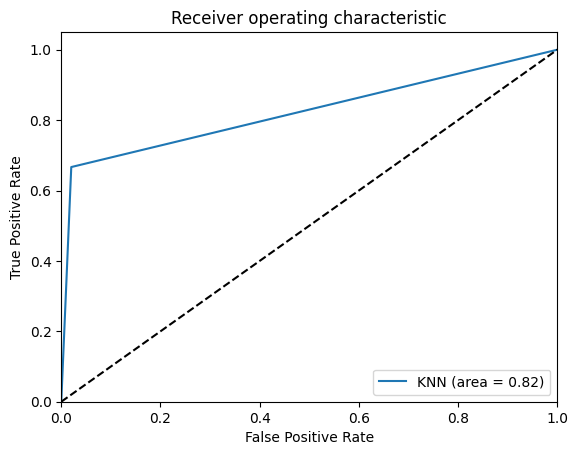

In [5]:
print("___________________KNN__________________")


# Create arrays to store K and accuracy values
K = range(1, 21)
accuracy = []

# Train and validate the KNN model for different values of K
for k in K:
    # Create the KNN model
    KNN = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    # Train the KNN model
    KNN.fit(X_train, y_train)
    # Validate the KNN model
    y_val_pred = KNN.predict(X_val)
    KNN_Val_Accuracy = accuracy_score(y_val, y_val_pred)
    accuracy.append(KNN_Val_Accuracy)

# Plot K versus accuracy
plt.plot(K, accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy')
plt.show()

# Create array to store k and accuracy values
k_values = range(1, 21)
accuracy = []

# Train and validate the KNN classifier for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracy.append(val_accuracy)

# Find the index of the best k value
best_k_idx = np.argmax(accuracy)
best_k = k_values[best_k_idx]
best_accuracy = accuracy[best_k_idx]
# Print the best k value and corresponding accuracy
print(f"Best k value: {best_k}")



# Create the KNN model
KNN = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
# Train the KNN model
KNN.fit(X_train, y_train)
# Validate the KNN model
y_val_pred = KNN.predict(X_val)
KNN_Val_Accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", KNN_Val_Accuracy)
# Test the KNN model
y_pred = KNN.predict(X_test)
# Evaluate the KNN model
KNN_accuracy = accuracy_score(y_test, y_pred)
print("Evaluation Accuracy: ", KNN_accuracy)
KNN_precision = precision_score(y_test, y_pred)
print("Evaluation Precision:",KNN_precision)
KNN_recall = recall_score(y_test, y_pred)
print("Evaluation Recall:   ",KNN_recall)
KNN_f1 = f1_score(y_test, y_pred)
print("Evaluation F1:       ", KNN_f1)
KNN_ROC_SCORE = roc_auc_score(y_test,y_pred)
print("ROC score:           ",KNN_ROC_SCORE)
# Plot ROC curves for KNN classifier
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, y_pred)
KNN_roc_auc = auc(KNN_fpr, KNN_tpr)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# **BAYES**

______________IMPROVED BAYES_____________


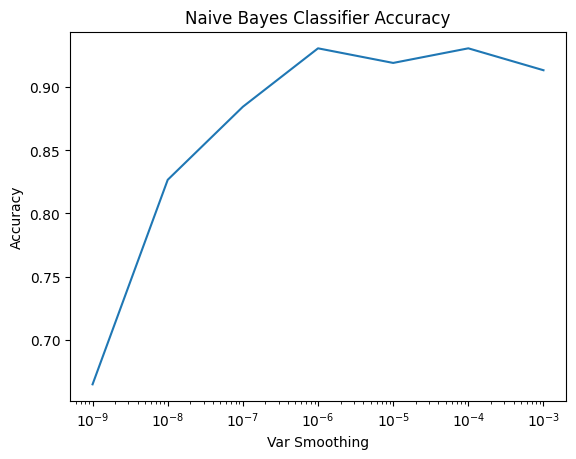

Best var_smoothing value: 1e-06
Validation Accuracy:  0.9132947976878613
Evaluation Accuracy:  0.9248554913294798
Evaluation Precision: 0.8421052631578947
Evaluation Recall:    0.6666666666666666
Evaluation F1:        0.744186046511628
ROC score:            0.8232662192393736


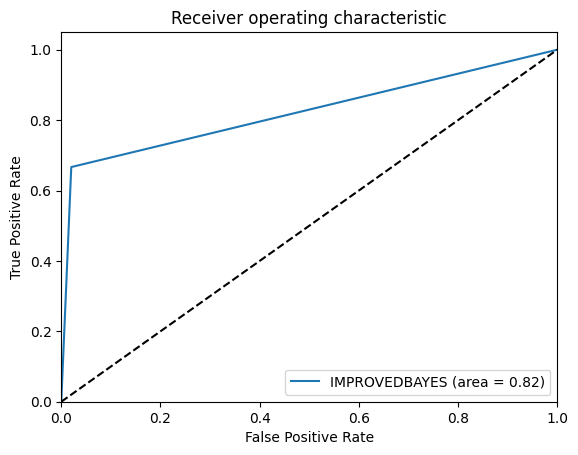

In [14]:
print("______________IMPROVED BAYES_____________")

var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
accuracy = []

# Train and validate the Naive Bayes classifier for different values of var_smoothing
for var_smoothing in var_smoothing_values:
    nb = GaussianNB(var_smoothing=var_smoothing)
    nb.fit(X_train, y_train)
    y_val_pred = nb.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracy.append(val_accuracy)

# Plot var_smoothing versus accuracy
plt.plot(var_smoothing_values, accuracy)
plt.xscale('log')
plt.xlabel('Var Smoothing')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier Accuracy')
plt.show()


# Create arrays to store alpha, var_smoothing, and accuracy values
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
accuracy = np.zeros(len(var_smoothing_values))

# Train and validate the Naive Bayes classifier for different values of alpha and var_smoothing
for i, var_smoothing in enumerate(var_smoothing_values):
    nb = GaussianNB(var_smoothing=var_smoothing)
    nb.fit(X_train, y_train)
    y_val_pred = nb.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracy[i] = val_accuracy

# Find the index of the best var_smoothing value
best_var_smoothing_idx = np.argmax(accuracy)
best_var_smoothing = var_smoothing_values[best_var_smoothing_idx]
best_accuracy =accuracy[best_var_smoothing_idx]


# Print the best var_smoothing values and corresponding accuracy
print(f"Best var_smoothing value: {best_var_smoothing}")



# Train the Naive Bayes classifier with the best hyperparameters
nb = GaussianNB(var_smoothing=1e-06, priors=[0.5,0.5])
nb.fit(X_train, y_train)

# Test the Naive Bayes classifier on the test set
y_test_pred = nb.predict(X_test)
# Compute the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: " , val_accuracy)
# Make predictions on the test set
y_test_pred = nb.predict(X_test)
# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Evaluation Accuracy: " , test_accuracy)
IMPROVEDBAYES_precision = precision_score(y_test, y_pred)
print("Evaluation Precision:", IMPROVEDBAYES_precision)
IMPROVEDBAYES_recall = recall_score(y_test, y_pred)
print("Evaluation Recall:   ", IMPROVEDBAYES_recall)
IMPROVEDBAYES_f1 = f1_score(y_test, y_pred)
print("Evaluation F1:       ", IMPROVEDBAYES_f1)
IMPROVEDBAYES_ROC_SCORE = roc_auc_score(y_test,y_pred)
print("ROC score:           ",IMPROVEDBAYES_ROC_SCORE)
# Plot ROC curves for SVM classifier
IMPROVEDBAYES_fpr, IMPROVEDBAYES_tpr, IMPROVEDBAYES_thresholds = roc_curve(y_test, y_pred)
IMPROVEDBAYES_roc_auc = auc(IMPROVEDBAYES_fpr, IMPROVEDBAYES_tpr)
plt.plot(IMPROVEDBAYES_fpr, IMPROVEDBAYES_tpr, label='IMPROVEDBAYES (area = %0.2f)' % IMPROVEDBAYES_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()





# **DECEISION TREE**

_______________DECISION TREE______________


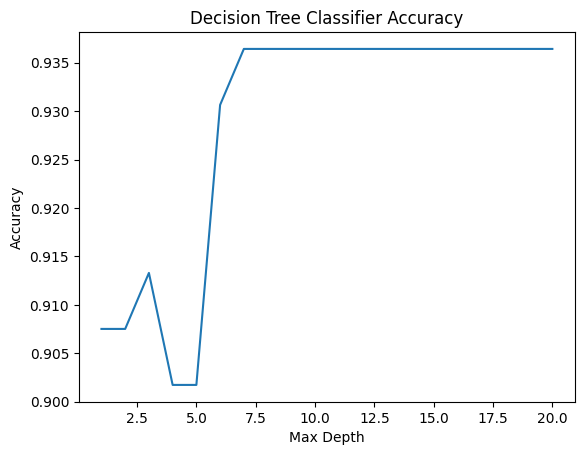

Best max_depth value: 7
Validation Accuracy:  0.9364161849710982
Evaluation Accuracy:  0.976878612716763
Evaluation Precision: 0.9166666666666666
Evaluation Recall:    0.9166666666666666
Evaluation F1:        0.9166666666666666
ROC score:            0.9516219239373601


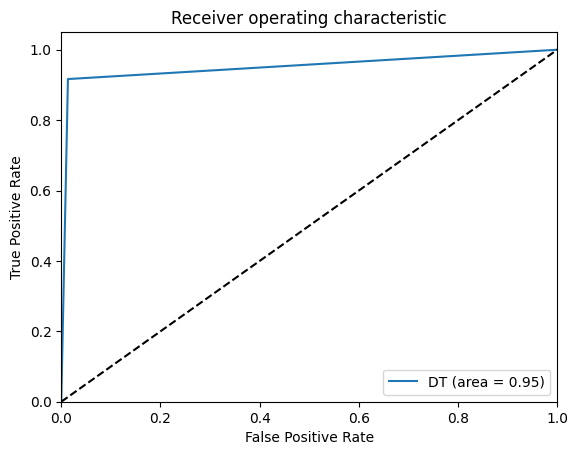

In [15]:
print("_______________DECISION TREE______________")

# Create arrays to store max_depth and accuracy values
max_depth_values = range(1, 21)
accuracy = []

# Train and validate the decision tree classifier for different values of max_depth
for max_depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    y_val_pred = dt.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracy.append(val_accuracy)

# Plot max_depth versus accuracy
plt.plot(max_depth_values, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()
# Find the index of the best max_depth value
best_depth_idx = np.argmax(accuracy)
best_depth = max_depth_values[best_depth_idx]
best_accuracy = accuracy[best_depth_idx]

# Print the best max_depth value and corresponding accuracy
print(f"Best max_depth value: {best_depth}")


# Create the Decision Tree model
DT = DecisionTreeClassifier(criterion='entropy', random_state=0, splitter='best',max_depth = best_depth)
# Train the Decision Tree model
DT.fit(X_train, y_train)
# Validate the Decision Tree model
D_val_pred = DT.predict(X_val)
DT_Val_Accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", DT_Val_Accuracy)
# Test the Decision Tree model
y_pred = DT.predict(X_test)
# Evaluate the Decision Tree model
DT_accuracy = accuracy_score(y_test, y_pred)
print("Evaluation Accuracy: ", DT_accuracy)
DT_precision = precision_score(y_test, y_pred)
print("Evaluation Precision:", DT_precision)
DT_recall = recall_score(y_test, y_pred)
print("Evaluation Recall:   ", DT_recall)
DT_f1 = f1_score(y_test, y_pred)
print("Evaluation F1:       ", DT_f1)
DT_ROC_SCORE = roc_auc_score(y_test,y_pred)
print("ROC score:           ",DT_ROC_SCORE)


# Plot ROC curves for SVM classifier
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, y_pred)
DT_roc_auc = auc(DT_fpr, DT_tpr)
plt.plot(DT_fpr, DT_tpr, label='DT (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()







# **MLP**

___________________MLP__________________


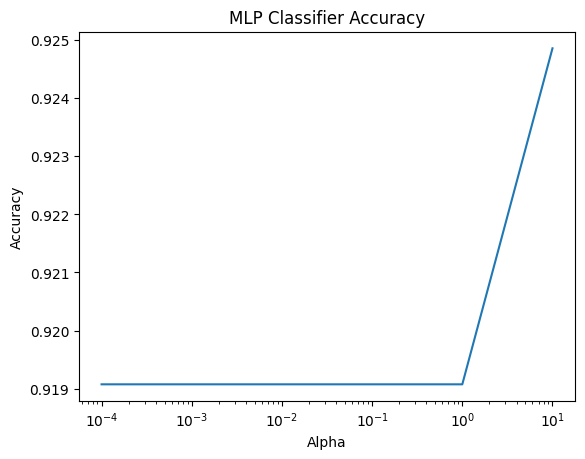

Best alpha value: 10
Validation Accuracy:  0.9364161849710982
Evaluation Accuracy:  0.9479768786127167
Evaluation Precision: 0.7777777777777778
Evaluation Recall:    0.875
Evaluation F1:        0.823529411764706
ROC score:            0.9173657718120807


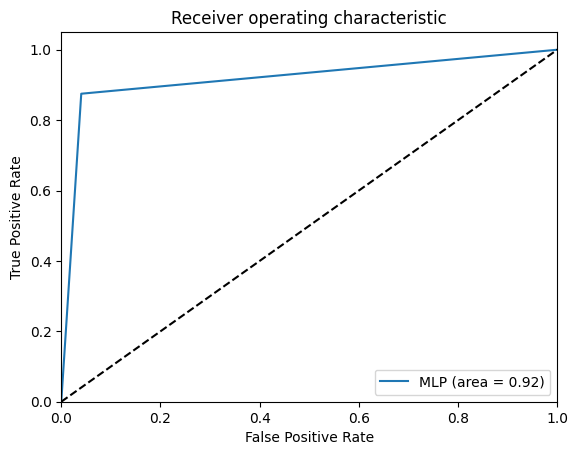

In [16]:
print("___________________MLP__________________")

# Create arrays to store alpha and accuracy values
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
accuracy = []

# Train and validate the MLP classifier for different values of alpha
for alpha in alpha_values:
    mlp = MLPClassifier(alpha=alpha, max_iter=10000, random_state=42)
    mlp.fit(X_train, y_train)
    y_val_pred = mlp.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    accuracy.append(val_accuracy)

# Plot alpha versus accuracy
plt.plot(alpha_values, accuracy)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('MLP Classifier Accuracy')
plt.show()

# Find the index of the best alpha value
best_alpha_idx = np.argmax(accuracy)
best_alpha = alpha_values[best_alpha_idx]
best_accuracy = accuracy[best_alpha_idx]

# Print the best alpha value and corresponding accuracy
print(f"Best alpha value: {best_alpha}")



# Create the MLP model
MLP = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam',alpha=0.001, learning_rate='adaptive', learning_rate_init=0.001, max_iter=2000)
# Train the MLP model
MLP.fit(X_train, y_train)
# Validate the MLP Tree model
y_val_pred = MLP.predict(X_val)
MLP_Val_Accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", MLP_Val_Accuracy)
# Test the MLP model
y_pred = MLP.predict(X_test)
# Evaluate the MLP model
MLP_accuracy = accuracy_score(y_test, y_pred)
print("Evaluation Accuracy: ", MLP_accuracy)
MLP_precision = precision_score(y_test, y_pred)
print("Evaluation Precision:", MLP_precision)
MLP_recall = recall_score(y_test, y_pred)
print("Evaluation Recall:   ", MLP_recall)
MLP_f1 = f1_score(y_test, y_pred)
print("Evaluation F1:       ", MLP_f1)
MLP_ROC_SCORE = roc_auc_score(y_test,y_pred)
print("ROC score:           ",MLP_ROC_SCORE)
# Plot ROC curves for SVM classifier
MLP_fpr, MLP_tpr, MLP_thresholds = roc_curve(y_test, y_pred)
MLP_roc_auc = auc(MLP_fpr, MLP_tpr)
plt.plot(MLP_fpr, MLP_tpr, label='MLP (area = %0.2f)' % MLP_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()





